In [119]:
#%matplotlib notebook

In [120]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [121]:
#Importing files
mouse_data = "../../../working/05-Matplotlib/Homework/Instructions/Pymaceuticals/data/Mouse_metadata.csv"
study_results = "../../../working/05-Matplotlib/Homework/Instructions/Pymaceuticals/data/Study_results.csv"

mouse_data_df = pd.read_csv(mouse_data)
study_results_df = pd.read_csv(study_results)

In [122]:
mouse_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [123]:
study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [124]:
#Merging our two dataframes
merge_df = pd.merge(mouse_data_df, study_results_df, on = "Mouse ID")
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [125]:
#Finding the duplicated row
duplicated_row = merge_df[merge_df.duplicated(keep = False)]
duplicated_row

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [126]:
#Deleting the duplicated row from our dataframe
merge_df = merge_df.drop(908)
merge_df = merge_df.drop(909)
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


# Summary Statistics Table

In [127]:
#vol_var = merge_df['Tumor Volume (mm3)']

In [128]:
#Calculating mean of tumor volume
mean_vol = merge_df['Tumor Volume (mm3)'].mean()
mean_vol

50.45414306457959

In [129]:
#Calculating median of tumor volume
median_vol = merge_df['Tumor Volume (mm3)'].median()
median_vol


48.95791906

In [130]:
#Calculating variance of tumor volume
var_vol = merge_df.var()['Tumor Volume (mm3)']
var_vol

79.16834895592136

In [131]:
#Calculating standard deviation of tumor volume
std_vol = merge_df.std()['Tumor Volume (mm3)']
std_vol

8.89765974601869

In [132]:
#Calculating SEM of tumor volume
sem_vol = merge_df.sem()['Tumor Volume (mm3)']
sem_vol

0.20461149544872292

In [133]:
#Creating summary statistics table for tumor volume

summary_stats_df = pd.DataFrame(
    {"Mean of Tumor Volume": [mean_vol],
     "Median of Tumor Volume": [median_vol],
     "Variance of Tumor Volume": [var_vol],
     "Standard Deviation of Tumor Volume": [std_vol],
     "SEM of Tumor Volume": [sem_vol]
    }
)

summary_stats_df.head()

,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
0,50.454143,48.957919,79.168349,8.89766,0.204611


# Bar Plot: Total Measurements for Regimens 

In [134]:
#labels = [merge_df["Sex"], ]
#loc male and loc female?
#x_val = merge_df['Drug Regimen'].value_counts()
#y_val = merge_df['Mouse ID'].value_counts()
#x_val
#plt.bar(x_val, y_val)

<IPython.core.display.Javascript object>


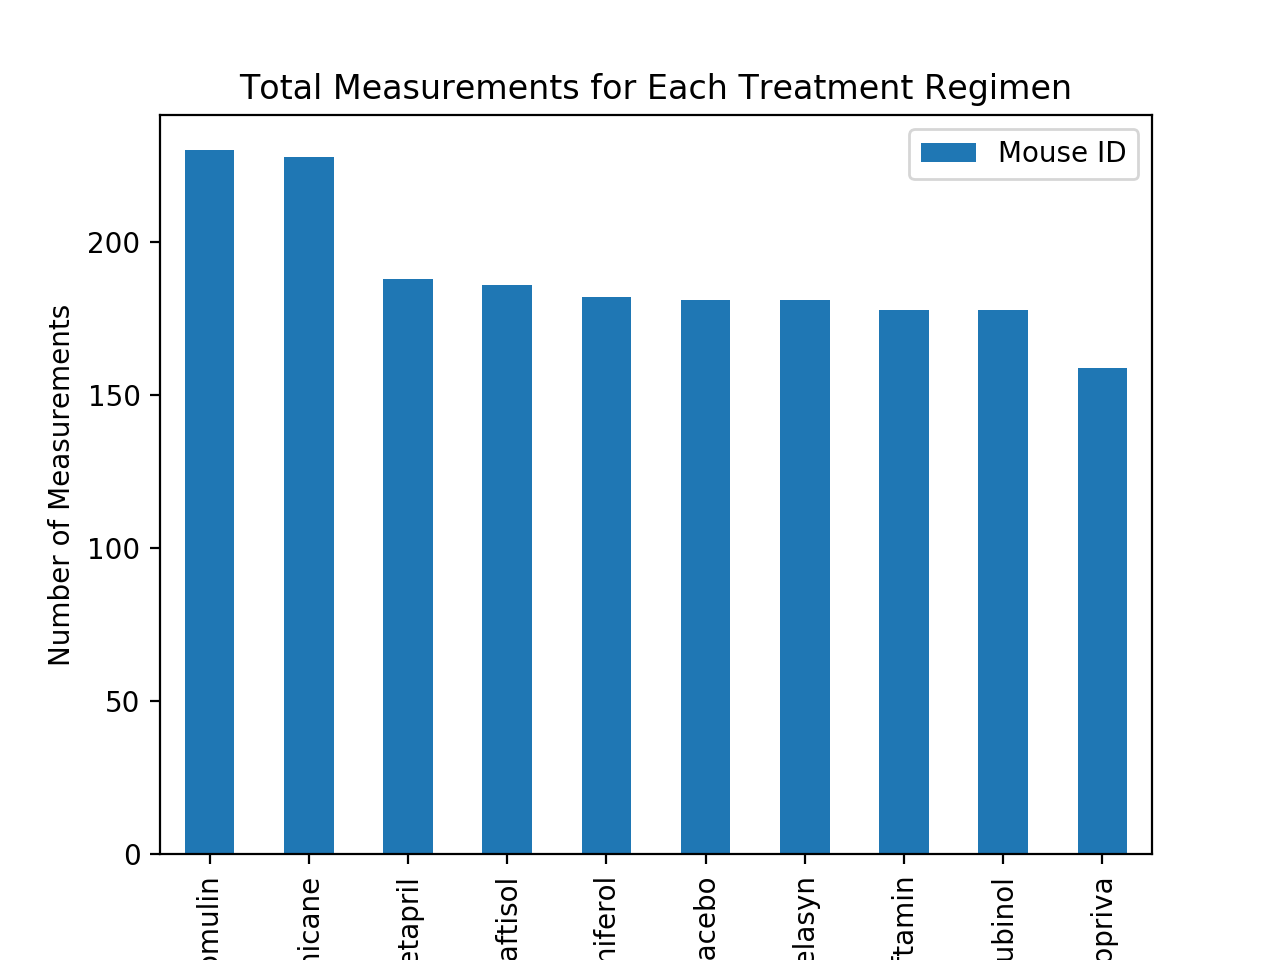

Text(0, 0.5, 'Number of Measurements')

In [155]:
#Creating bar graph using Pandas to show total number of measurements taken for each treatment regimen

#Creating a new data frame with only the Mouse ID and Drug Regimen columns
mouse_drug_df = merge_df[['Mouse ID', 'Drug Regimen']]

#Calculating total number of measurements per drug regimen
mouse_drug_df = mouse_drug_df.groupby('Drug Regimen').count()

#Sorting our dataframe from higher number of measurements to lowest
mouse_drug_df = mouse_drug_df.sort_values(by = 'Mouse ID', ascending = False)

#Creating bar graph based on our dataframe
mouse_drug_df.plot.bar()

#Placing title and axis titles 
plt.title("Total Measurements for Each Treatment Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Measurements")

In [152]:
#Setting x axis and tick locations
mouse_drug_df2 = merge_df[['Mouse ID', 'Drug Regimen']]
new = mouse_drug_df2.groupby('Drug Regimen').count()
y_values = new.index
y_values

x_axis = np.arange(len(mouse_drug_df2))
tick_locations = [value for value in x_axis]
mouse_drug_df2

,Mouse ID,Drug Regimen
0,k403,Ramicane
1,k403,Ramicane
2,k403,Ramicane
3,k403,Ramicane
4,k403,Ramicane
...,...,...
1888,z969,Naftisol
1889,z969,Naftisol
1890,z969,Naftisol
1891,z969,Naftisol


In [154]:
#plt.figure(figsize = (16,9))
plt.bar(x_axis, mouse_drug_df2["Mouse ID"])
plt.xticks(tick_locations, y_values, rotation = "vertical")
#plt.show()

# Quartiles, Outliers, and Boxplots